## Задача 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def func(x):
    return np.sin(x/5)*np.exp(x/10) + 5*np.exp(-x/2)

In [3]:
grid1 = np.array([1, 15])
grid2 = np.array([1, 8, 15])
grid3 = np.array([1, 4, 10, 15])

In [4]:
f1 = func(grid1)
f2 = func(grid2)
f3 = func(grid3)

In [5]:
A1 = np.array([[1, 1], [1, 15]])
A2 = np.array([[1, 1, 1], [1, 8, 64], [1, 15, 225]])
A3 = np.array([[1, 1, 1, 1], [1, 4, 16, 64], [1, 10, 100, 1000], [1, 15, 225, 15*225]])

In [6]:
W1 = np.linalg.solve(A1, f1)
W2 = np.linalg.solve(A2, f2)
W3 = np.linalg.solve(A3, f3)

In [7]:
grid = np.arange(1, 15, 0.001)
y = func(grid)

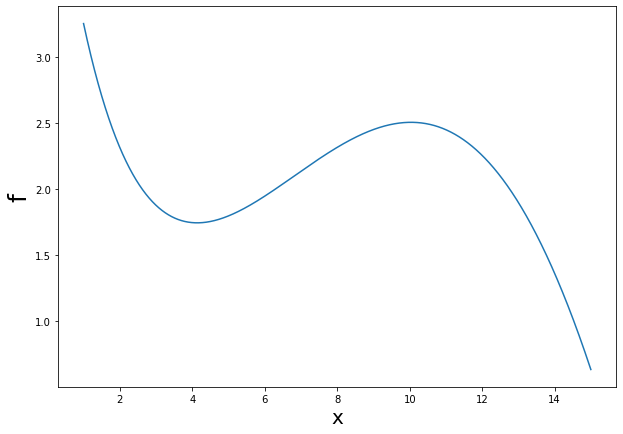

In [8]:
plt.figure(figsize = (10, 7))
plt.plot(grid, y)
plt.xlabel('x', size = 20)
plt.ylabel('f', size = 25)
plt.show()

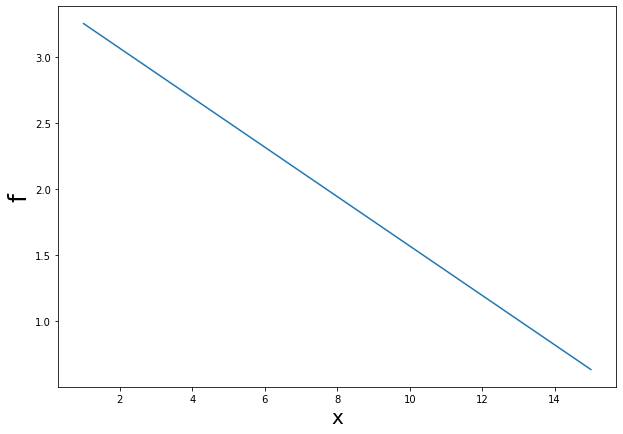

In [9]:
plt.figure(figsize = (10, 7))
plt.plot(grid, W1[0] + W1[1] * grid)
plt.xlabel('x', size = 20)
plt.ylabel('f', size = 25)
plt.show()

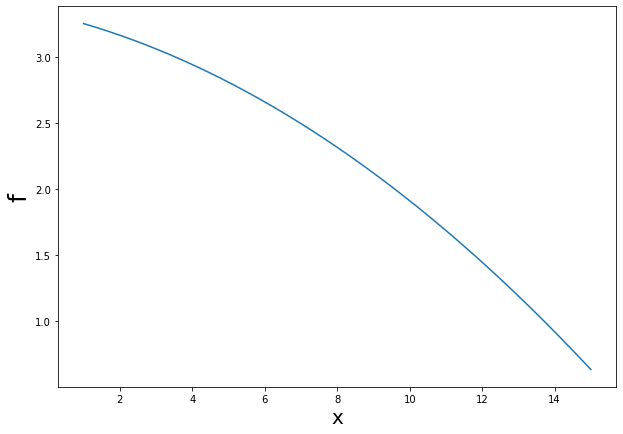

In [10]:
plt.figure(figsize = (10, 7))
plt.plot(grid, W2[0] + W2[1] * grid + W2[2] * grid * grid)
plt.xlabel('x', size = 20)
plt.ylabel('f', size = 25)
plt.show()

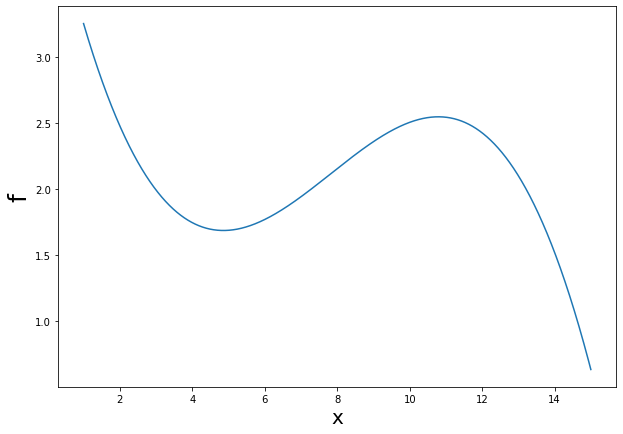

In [11]:
plt.figure(figsize = (10, 7))
plt.plot(grid, W3[0] + W3[1] * grid + W3[2] * grid * grid + W3[3] * grid * grid * grid)
plt.xlabel('x', size = 20)
plt.ylabel('f', size = 25)
plt.show()

Вывод: как можно увидеть из графиков, при увеличении степени многочлена, график всё сильнее начинает совпадать с графиком исходной функции. Самое лучшее приближение из полученных - это многочлен степени 3 с коэффициентами:  
{{print(np.round(W3, 2))}}

## Задача 2

In [12]:
def two_vectors(x, y):
    x = np.array(x)
    y = np.array(y)
    print('Количество позиций, для которых элементы в обоих векторах ненулевые:', np.count_nonzero(x * y))
    print('Количество позиций, для которых хотя бы в одном из двух векторов есть ненулевой элемент:', np.count_nonzero(x + y))

In [13]:
x = np.array([1, 0, 1, 1, 0, 1, 1])
y = np.array([0, 2, 0, 2, 0, 2, 0])
two_vectors(x, y)

Количество позиций, для которых элементы в обоих векторах ненулевые: 2
Количество позиций, для которых хотя бы в одном из двух векторов есть ненулевой элемент: 6


## Задача 3

In [14]:
def copy_of_elem(x, N):
    print(np.repeat(x, N))

In [15]:
x = np.array([1, 2, 0])
N = 3
copy_of_elem(x, N)

[1 1 1 2 2 2 0 0 0]


## Задача 4

In [16]:
def max_elem_after_zero(x): # первый вариант
    print('Answer:', np.max(x[1:][(x == 0)[:-1]]))

In [17]:
def max_elem_after_zero2(x): # второй вариант
    min_el = np.min(x)
    y = np.insert(x[:-1], 0, 1)
    # display(y)
    print('Answer:', np.max(np.where(y == 0, x, min_el)))

In [18]:
x = np.array([0, 11, 0, 0, -7, 2, 0, 4, 0])
max_elem_after_zero(x)
max_elem_after_zero2(x)

Answer: 11
Answer: 11


## Задача 5

In [19]:
def replace_zeros_with_prev(x):
    index = np.arange(len(x))
    index[x == 0] = 0
    prev_index = np.maximum.accumulate(index)
    print(x[prev_index])

In [20]:
x = np.array([8, 0, 0, 1, 0, 0, 0, -17.5, 0])
replace_zeros_with_prev(x)

[  8.    8.    8.    1.    1.    1.    1.  -17.5 -17.5]


## Задача 6

In [23]:
def teylor(x0, N):
    n = np.arange(1, N)
    added = (-1)**(n + 1) * (x0) ** n / n
    return np.sum(added)

In [25]:
x0 = 0.9 # радиус сходимости равен 1
N = 20
ans = teylor(x0, N)
print(ans)
print('Разность с настоящим решением:', abs(np.log(1 + x0) - ans))

0.6451287548451374
Разность с настоящим решением: 0.0032748686727427367


## Задача 7

In [26]:
def aver_cov(x):
    print('Средние выборочные:', np.sum(x, axis = 0) / x.shape[0])
#     print(x - np.sum(x, axis = 0) / x.shape[0])
    A = (x - np.sum(x, axis = 0) / x.shape[0]) / x.shape[0]
    print('Матрица ковариаций:', A.T @ A, sep = '\n')

In [27]:
x = np.array([[175, 4], [20, 2], [25, 8]])
aver_cov(x)

Средние выборочные: [73.33333333  4.66666667]
Матрица ковариаций:
[[1724.07407407   -9.62962963]
 [  -9.62962963    2.07407407]]


## Задача 8

In [28]:
def sigmoida(x):
    return 1 / (1 + np.exp(-x))

def hiperbolic_tangent(x):
    return (np.exp(x) - np.exp(-x)) / (np.exp(x) + np.exp(-x))

def lstm(x, b, Wi, Wo, Wf, Wc, Ui, Uo, Uf, Uc, h_prev, c_prev, bi, bo, bf, bc):
    c0 = 0
    h0 = 0
    f = sigmoida(Wf @ x + Uf @ h_prev + bf)
    i = sigmoida(Wi @ x + Ui @ h_prev + bi)
    o = sigmoida(Wo @ x + Uo @ h_prev + bo)
    c_tilda = hiperbolic_tangent(Wc @ x + Uc @ h_prev + bc)
    c = f * c_prev + i * c_tilda
    h = o * c
    return o, h, c